# t-SNE Visualizations
I'll use t-SNE to get some quick visualizations of cell line clustering before and after different normalization procedures for hte CST data. 

In [67]:
import numpy as np
from matplotlib import pyplot as plt
from tsne import bh_sne
from copy import deepcopy
from clustergrammer import Network 

Define function for making two tsne plots

In [60]:
def make_cl_tsne_hist_plex(mat, cmap_left=None, cmap_right=None):
    # the matrix needs to be transposed in order to cluster the numbers
    x_data = mat.transpose()

    # convert image data to float64 matrix. float64 is need for bh_sne
    x_data = np.asarray(x_data).astype('float64')

    # perform t-SNE embedding, lowered perplexity
    vis_data = bh_sne(x_data, perplexity=5)

    # plot the result
    vis_x = vis_data[:, 0]
    vis_y = vis_data[:, 1]

    fig, axarr = plt.subplots(ncols=2, figsize=(10,5))
    
    marker_size = 150
    
    if cmap_left == None:
        axarr[0].scatter(vis_x, vis_y, s=marker_size)
    else:
        axarr[0].scatter(vis_x, vis_y, c=cmap_left, cmap=plt.cm.get_cmap('prism',len(cmap_left)), s=marker_size)
    
    if cmap_right == None:
        axarr[1].scatter(vis_x, vis_y, marker_size)
    else:
        axarr[1].scatter(vis_x, vis_y, c=cmap_right, cmap=plt.cm.get_cmap('jet',len(cmap_right)), s=marker_size) 

    plt.show()

In [56]:
def make_simple_cl_names(tuple_cols):
    cl_names = []
    for inst_tuple in tuple_cols:
        cl_names.append(inst_tuple[0])
    return cl_names

# load cell line information 
cl_info = net.load_json_to_dict('../cell_line_info/cell_line_info_dict.json')

def make_hist_cmap(cl_names):
    hist_cmap = [] 
    for inst_cl in cl_names:
        inst_hist = cl_info[inst_cl]['Histology']
        if inst_hist == 'NSCLC':
            hist_cmap.append(0)
        else:
            hist_cmap.append(1)
    return hist_cmap

def make_plex_cmap(cl_names):
    plex_cmap = []
    for inst_cl in cl_names:
        inst_plex = cl_info[inst_cl]['Plex']
        plex_cmap.append(inst_plex)
    return plex_cmap


# t-SNE Cell Line Clustering based on Phosphorylation Data
I will make two tsne figures showing cell line clustering with histology and plex overlays. 

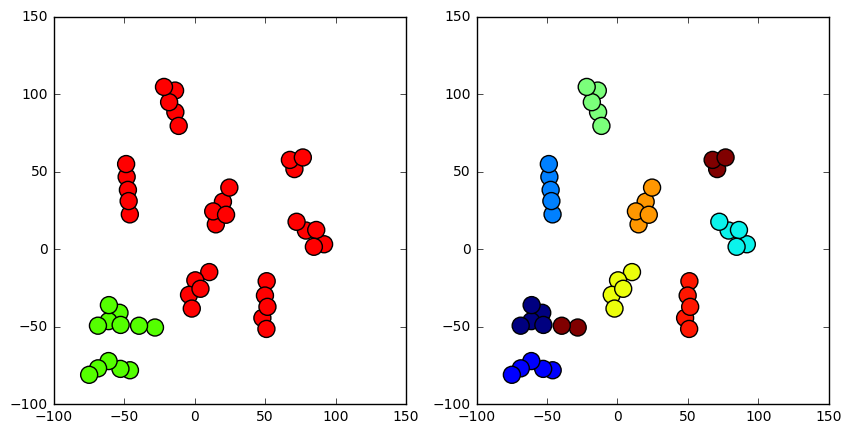

In [66]:
filename = '../lung_cellline_3_1_16/lung_cellline_phospho/' + \
'lung_cellline_TMT_phospho_combined_ratios.tsv'

# get matrix of data for tsne 
net = deepcopy(Network())
net.load_file(filename)
net.swap_nan_for_zero()
inst_df = net.dat_to_df()
df = inst_df['mat']
mat = df.values

# make colormaps based on histology and plexes
tuple_cols = df.columns.tolist()
cl_names = make_simple_cl_names(tuple_cols)
hist_cmap = make_hist_cmap(cl_names)
plex_cmap = make_plex_cmap(cl_names)

# make two tsne visualizations with histology and plex categories 
make_cl_tsne_hist_plex(mat, hist_cmap, plex_cmap)

### Cell lines cluster based on Histology and Plexd
The left tsne plot shows cell lines colored based on histology, SCLC is green and NSCLC is red. The cell cell lines appear to largely cluster based on shared histology. 

The right tsne plot shows cell lines colored based on their plex - there are 5 cell lines per plex. The cell lines cluster almost exclusively into groups that belong to the same plex. 

From these figures we can see that two plexes are composed of entirely SCLC cell lines and that there is a large batch effect that needs to be corrected. 

# t-SNE Clustering with no missing data
Plexes have common missing data, which is why clustering the cell lines using phosphorylation data that has missing data will result in cell lines that cluster based on their plex. We can try clustering the cell lines using only the phosphorylations that have been measured in all cell lines to see if we still see the same pattern of cell line clustering. 